<a href="https://colab.research.google.com/github/eshreyareddy/EDA-colab-and-apache-beam-colab/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()




Saving census2000.csv to census2000.csv


In [4]:
import pandas as pd

data = pd.read_csv('census2000.csv')
data.head()


,Sex,Year,Age,People
0,1,1900,0,4619544
1,1,2000,0,9735380
2,1,1900,5,4465783
3,1,2000,5,10552146
4,1,1900,10,4057669


In [5]:
from IPython.core.display import display, HTML

def run_d3_script(script):
    display(HTML(f"""
        <script src="https://d3js.org/d3.v5.min.js"></script>
        <script>{script}</script>
    """))


In [7]:
from IPython.core.display import display, HTML

# Extracting two numerical columns for the scatter plot
x_data = data[data.columns[1]]  # Assuming 2nd column is numeric
y_data = data[data.columns[2]]  # Assuming 3rd column is numeric

# Creating the D3.js script for an interactive scatter plot
script = """
    <script src="https://d3js.org/d3.v5.min.js"></script>
    <div id="d3-container"></div>
    <script>
        var data = """ + pd.DataFrame({'x': x_data, 'y': y_data}).to_json(orient='records') + """

        var width = 500, height = 500;

        var svg = d3.select('#d3-container')
            .append('svg')
            .attr('width', width)
            .attr('height', height);

        var xScale = d3.scaleLinear().domain([d3.min(data, d => d.x), d3.max(data, d => d.x)]).range([0, width]);
        var yScale = d3.scaleLinear().domain([d3.min(data, d => d.y), d3.max(data, d => d.y)]).range([height, 0]);

        svg.selectAll('circle')
            .data(data)
            .enter()
            .append('circle')
            .attr('cx', d => xScale(d.x))
            .attr('cy', d => yScale(d.y))
            .attr('r', 5)
            .attr('fill', 'steelblue')
            .on('mouseover', function(d) {
                d3.select(this).attr('r', 10).attr('fill', 'red');
            })
            .on('mouseout', function(d) {
                d3.select(this).attr('r', 5).attr('fill', 'steelblue');
            });
    </script>
"""

display(HTML(script))


In [8]:
from IPython.core.display import display, HTML

script = """
    <script src="https://d3js.org/d3.v5.min.js"></script>
    <div id="d3-container"></div>
    <script>
        var data = """ + pd.DataFrame({'x': x_data, 'y': y_data}).to_json(orient='records') + """

        var width = 600, height = 600, padding = 50;

        var svg = d3.select('#d3-container')
            .append('svg')
            .attr('width', width)
            .attr('height', height);

        var xScale = d3.scaleLinear().domain([d3.min(data, d => d.x), d3.max(data, d => d.x)]).range([padding, width - padding]);
        var yScale = d3.scaleLinear().domain([d3.min(data, d => d.y), d3.max(data, d => d.y)]).range([height - padding, padding]);

        // Add X axis
        svg.append("g")
           .attr("transform", "translate(0," + (height - padding) + ")")
           .call(d3.axisBottom(xScale));

        // Add Y axis
        svg.append("g")
           .attr("transform", "translate(" + padding + ",0)")
           .call(d3.axisLeft(yScale));

        svg.selectAll('circle')
            .data(data)
            .enter()
            .append('circle')
            .attr('cx', d => xScale(d.x))
            .attr('cy', d => yScale(d.y))
            .attr('r', 5)
            .attr('fill', 'steelblue')
            .on('mouseover', function(d) {
                d3.select(this).attr('r', 10).attr('fill', 'red');
            })
            .on('mouseout', function(d) {
                d3.select(this).attr('r', 5).attr('fill', 'steelblue');
            });
    </script>
"""

display(HTML(script))


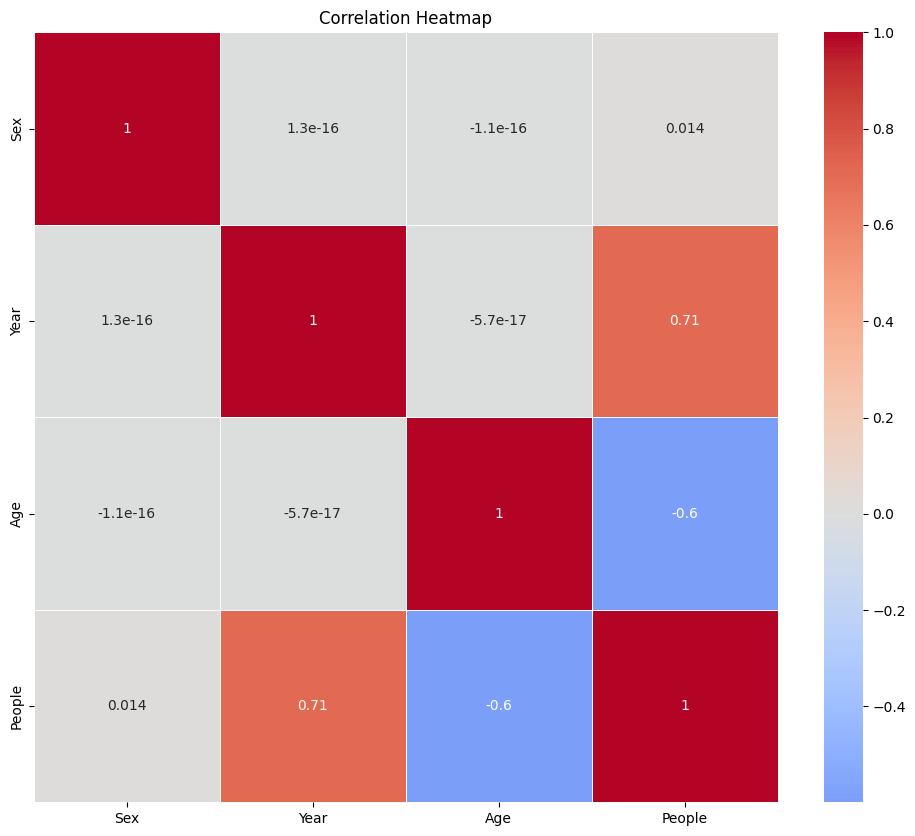

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('census2000.csv')

# Compute the correlation matrix
corr = data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


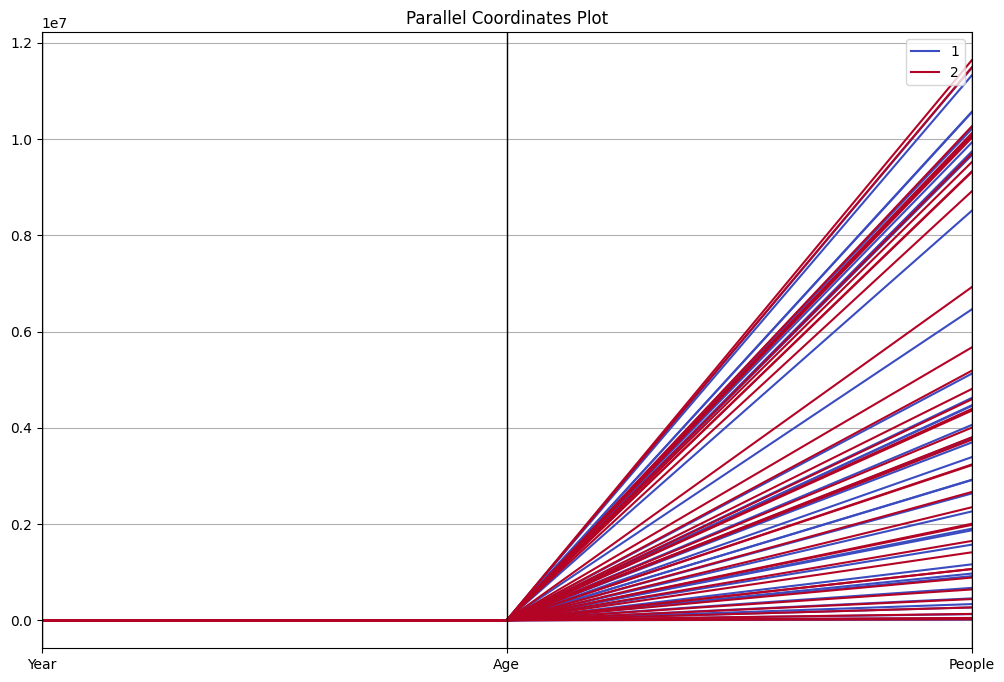

In [13]:
# Generate a parallel coordinates plot using the entire dataset
plt.figure(figsize=(12, 8))
parallel_coordinates(data, 'Sex', colormap='coolwarm')
plt.title('Parallel Coordinates Plot')
plt.show()

